# Tweepy Sentiment Analysis Homework Assignment - Brooke Cooper

* View the `tweepy` API documentation here: http://docs.tweepy.org/en/v3.8.0/getting_started.html
* View VaderSentiment documentation here: https://github.com/cjhutto/vaderSentiment

### News Organization Sentiment Analysis Scatter Plots
![Images](Images/bbc_output.png)
![Images](Images/cbs_output.png)
![Images](Images/cnn_output.png)
![Images](Images/fox_output.png)
![Images](Images/nyt_output.png)

### Average Sentiment Analysis by News Organization - Bar Chart

![Images](Images/5_major_news_orgs_output.png)

In [1]:
%matplotlib inline

# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
import calendar
from datetime import date, datetime, timedelta

In [2]:
# Extract various Twitter API keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# The JSON Parser works differently with the Tweepy Cursor
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

In [4]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Pull 100 Tweets for Each News Organization Via a For Loop
* My code at this point is returning 300 tweets per news organization twitter account even though I specified 100.  Further debugging necessary.

In [5]:
# List of target news organization accounts
user_accounts = ["bbcnews", "cbsnews", "cnn", "foxnews", "nytimes"]

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Loop for each news organization
for user_account in user_accounts:
    
    # Only iterate through the first 100 tweets
    for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)
        
    # Preview the tweets list
    tweets
        
    # Loop through Tweets list and process data
    for t in tweets:
        tweet_id.append(t.id)
        created_at.append(t.created_at)
        favorite_count.append(t.favorite_count)
        full_text.append(t.full_text)
        twitter_user.append(user_account)
        
# Build a tweets DataFrame
master_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })


# set DataFrame to not truncate
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Preview dataframe
master_tweets_df

<ipython-input-5-ecfa40eea2ac>:41: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,bbcnews,1330995802244853761,2020-11-23 22:05:02,649,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb
1,bbcnews,1330987870354624513,2020-11-23 21:33:31,97,Chinese spacecraft sets off on Moon sample quest https://t.co/UGoSnwn9nb
2,bbcnews,1330986779143442432,2020-11-23 21:29:11,66,Grenfell Tower: Cladding firm 'stretched the truth' on fire safety https://t.co/mb5UPmPpn1
3,bbcnews,1330979973860122627,2020-11-23 21:02:08,109,Labour chief whip demands apology from Jeremy Corbyn https://t.co/BIlfNRwSpq
4,bbcnews,1330971445703348225,2020-11-23 20:28:15,46,Snapchat Spotlight to pay users $1m a day for viral hits https://t.co/Z1yzXwCiJ0
5,bbcnews,1330960829118877696,2020-11-23 19:46:04,128,"“The Christmas holiday period, the loosenings around that… we all know that that is going to come at a risk”\n\nProf Chris Whitty calls for people to take a “public-spirited approach” to Christmas – but adds it “will have an impact”\n\nhttps://t.co/DbgmK9zkgM https://t.co/9nWkjjK6fj"
6,bbcnews,1330958446137643013,2020-11-23 19:36:36,318,"""There will be no compulsory vaccination, that's not the way we do things in this country""\n\nBut, Prime Minister Boris Johnson says he rejects the ""propaganda of the anti-vaxxers"" \n\nLatest: https://t.co/DbgmK9zkgM https://t.co/Lcfzp9XQbu"
7,bbcnews,1330958216126148610,2020-11-23 19:35:41,64,"How can the roll-out of the vaccine happen smoothly? asks @BBCFergusWalsh\n\nBoris Johnson says there are ""immense"" logistical challenges to overcome\n\nProf Chris Whitty adds vaccines will only be rolled out when it can be guaranteed that they are safe\n\nhttps://t.co/5ARa0vePKq https://t.co/pjqc0R6Bu8"
8,bbcnews,1330957129277169664,2020-11-23 19:31:22,85,"“Science and also the seasons, when we get through to spring, will help to de-risk this infection”\n\nProf Chris Whitty adds: “We’ll be able to pull back from these really oppressive things we have to do, socially and economically, to keep it under control""\n\nhttps://t.co/DbgmK9zkgM https://t.co/qCvSHoaj6O"
9,bbcnews,1330955339794092034,2020-11-23 19:24:15,82,“Keeping young people in education wherever we can; that’s been at the heart of what we’ve been trying to do over the past few months”\n\nPrime Minister Boris Johnson says there are currently no plans to close schools early ahead of Christmas\n\nhttps://t.co/DbgmK9zkgM https://t.co/GKKaQbivvR


In [6]:
len(master_tweets_df)

1500

### Using the Cursor Method to capture 100 tweets per news organizations at a time into its own dataframe.

### BBC News

In [7]:
# Set BBC News user account
user_account = "bbcnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
bbc_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
bbc_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,bbcnews,1330995802244853761,2020-11-23 22:05:02,658,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb
1,bbcnews,1330987870354624513,2020-11-23 21:33:31,97,Chinese spacecraft sets off on Moon sample quest https://t.co/UGoSnwn9nb
2,bbcnews,1330986779143442432,2020-11-23 21:29:11,66,Grenfell Tower: Cladding firm 'stretched the truth' on fire safety https://t.co/mb5UPmPpn1
3,bbcnews,1330979973860122627,2020-11-23 21:02:08,109,Labour chief whip demands apology from Jeremy Corbyn https://t.co/BIlfNRwSpq
4,bbcnews,1330971445703348225,2020-11-23 20:28:15,46,Snapchat Spotlight to pay users $1m a day for viral hits https://t.co/Z1yzXwCiJ0


In [8]:
len(bbc_tweets_df)

100

In [9]:
# Set tweets series as data source for analysis
tweet_text_series = bbc_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
bbc_tweets_df["Compound SA"] = compound
bbc_tweets_df["Positive SA"] = positive
bbc_tweets_df["Neutral SA"] = neutral
bbc_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
bbc_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
bbc_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,bbcnews,1330995802244853761,2020-11-23 22:05:02,658,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb,0.5859,0.322,0.678,0.000
1,bbcnews,1330987870354624513,2020-11-23 21:33:31,97,Chinese spacecraft sets off on Moon sample quest https://t.co/UGoSnwn9nb,0.0000,0.000,1.000,0.000
2,bbcnews,1330986779143442432,2020-11-23 21:29:11,66,Grenfell Tower: Cladding firm 'stretched the truth' on fire safety https://t.co/mb5UPmPpn1,0.4019,0.329,0.516,0.155
3,bbcnews,1330979973860122627,2020-11-23 21:02:08,109,Labour chief whip demands apology from Jeremy Corbyn https://t.co/BIlfNRwSpq,0.0516,0.130,0.870,0.000
4,bbcnews,1330971445703348225,2020-11-23 20:28:15,46,Snapchat Spotlight to pay users $1m a day for viral hits https://t.co/Z1yzXwCiJ0,-0.1027,0.000,0.887,0.113


The period began at 2020-11-22 23:50:29 and ended at 2020-11-23 22:05:02.
The duration was 0 days 22:14:33.


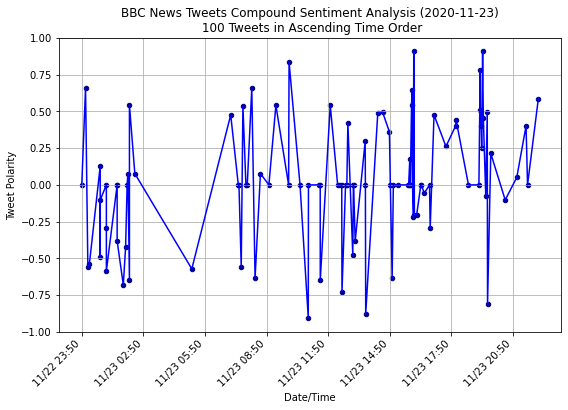

In [10]:
# Extract date-time stamps from dataframe to a list
time_series = bbc_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = bbc_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"BBC News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
bbc_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/bbc_output.png')

### CBS News

In [11]:
# Set CBS News user account
user_account = "cbsnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cbs_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cbs_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,cbsnews,1330997105343729668,2020-11-23 22:10:13,157,"President-elect Joe Biden told a virtual meeting of mayors across the country that his administration will support them through the COVID-19 pandemic, regardless of politics: “Red cities, blue cities, it doesn’t matter. They’re all American cities.” https://t.co/RMh3Zzl1b0 https://t.co/qZii3mX0Pw"
1,cbsnews,1330996923717840900,2020-11-23 22:09:29,50,".@chueyburns says President-elect Biden's administration choices so far show that he is putting a premium on Washington experience and familiarity: ""They are a little bit predictable and perhaps boring, but that's by design"" https://t.co/1DEKsQtEdA https://t.co/Ak3u63cqLV"
2,cbsnews,1330995020766339081,2020-11-23 22:01:56,37,"WATCH LIVE: CBSN's ""Red &amp; Blue"" has news and analysis on today's top politics stories, as President-elect Joe Biden continues naming top appointments for his administration https://t.co/Nj065CIsxp https://t.co/z24Q89f0k3"
3,cbsnews,1330991949671768079,2020-11-23 21:49:44,86,GSA will brief House and Senate committee leaders as it stalls transition https://t.co/LdR1tLcJWS
4,cbsnews,1330989330257633283,2020-11-23 21:39:19,0,"RT @adam_brew: JUST IN: The Michigan Board of State Canavassers voted to certify Michigan's election results. 3 yes votes, one abstention."


In [12]:
len(cbs_tweets_df)

100

In [13]:
# Set tweets series as data source for analysis
tweet_text_series = cbs_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cbs_tweets_df["Compound SA"] = compound
cbs_tweets_df["Positive SA"] = positive
cbs_tweets_df["Neutral SA"] = neutral
cbs_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cbs_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cbs_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,cbsnews,1330997105343729668,2020-11-23 22:10:13,157,"President-elect Joe Biden told a virtual meeting of mayors across the country that his administration will support them through the COVID-19 pandemic, regardless of politics: “Red cities, blue cities, it doesn’t matter. They’re all American cities.” https://t.co/RMh3Zzl1b0 https://t.co/qZii3mX0Pw",0.4215,0.095,0.905,0.000
1,cbsnews,1330996923717840900,2020-11-23 22:09:29,50,".@chueyburns says President-elect Biden's administration choices so far show that he is putting a premium on Washington experience and familiarity: ""They are a little bit predictable and perhaps boring, but that's by design"" https://t.co/1DEKsQtEdA https://t.co/Ak3u63cqLV",-0.1655,0.000,0.954,0.046
2,cbsnews,1330995020766339081,2020-11-23 22:01:56,37,"WATCH LIVE: CBSN's ""Red &amp; Blue"" has news and analysis on today's top politics stories, as President-elect Joe Biden continues naming top appointments for his administration https://t.co/Nj065CIsxp https://t.co/z24Q89f0k3",0.3818,0.122,0.878,0.000
3,cbsnews,1330991949671768079,2020-11-23 21:49:44,86,GSA will brief House and Senate committee leaders as it stalls transition https://t.co/LdR1tLcJWS,0.0000,0.000,1.000,0.000
4,cbsnews,1330989330257633283,2020-11-23 21:39:19,0,"RT @adam_brew: JUST IN: The Michigan Board of State Canavassers voted to certify Michigan's election results. 3 yes votes, one abstention.",0.4019,0.119,0.881,0.000


The period began at 2020-11-23 01:53:54 and ended at 2020-11-23 22:10:13.
The duration was 0 days 20:16:19.


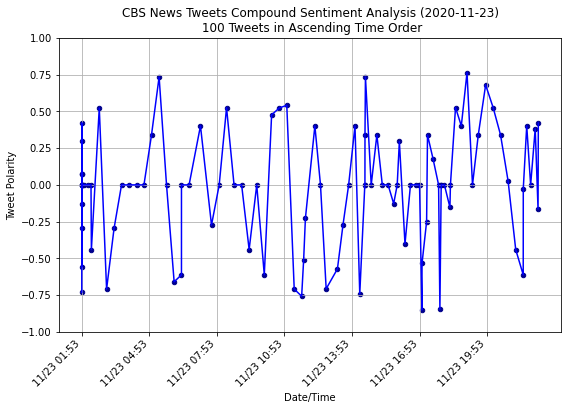

In [14]:
# Extract date-time stamps from dataframe to a list
time_series = cbs_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = cbs_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"CBS News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
cbs_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/cbs_output.png')

### CNN

In [15]:
# Set CNN user account
user_account = "CNN"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cnn_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cnn_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,CNN,1330992989129338880,2020-11-23 21:53:51,197,How President Trump's fundraising could benefit his post-White House political life https://t.co/S7Pd9G1a9j https://t.co/FOlQo0EmjL
1,CNN,1330984890037317637,2020-11-23 21:21:40,822,"President-elect Joe Biden will choose Janet Yellen, former chair of the Federal Reserve, as his secretary of the Treasury, according to a source. She would be the first woman in the role. https://t.co/9nyyYQ3bsc"
2,CNN,1330977669811462144,2020-11-23 20:52:59,547,"Having a single negative Covid-19 test is not sufficient for a safe Thanksgiving because it does not prove that you aren't infectious today, and it certainly doesn't prove that you're not infectious tomorrow, Megan Ranney writes for @CNNOpinion https://t.co/0xGLB4bR9v"
3,CNN,1330972675385270277,2020-11-23 20:33:08,711,"Macy's says its 2020 holiday window displays are ""a form of a thank you letter to first responders, essential workers, marchers for equality, and New Yorkers who showed their grit, good humor, and hopeful spirit"" during the year https://t.co/3gPMJKoaPa https://t.co/ThQKfDq4Pm"
4,CNN,1330971111736176642,2020-11-23 20:26:55,307,"The first clear evidence that Native Americans consumed hallucinogenic plants at rock art sites has been found in the Pinwheel Cave in Southern California, according to new research https://t.co/HpHQJufj8p"


In [16]:
len(cnn_tweets_df)

100

In [17]:
# Set tweets series as data source for analysis
tweet_text_series = cnn_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cnn_tweets_df["Compound SA"] = compound
cnn_tweets_df["Positive SA"] = positive
cnn_tweets_df["Neutral SA"] = neutral
cnn_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cnn_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cnn_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,CNN,1330992989129338880,2020-11-23 21:53:51,197,How President Trump's fundraising could benefit his post-White House political life https://t.co/S7Pd9G1a9j https://t.co/FOlQo0EmjL,0.4588,0.200,0.800,0.000
1,CNN,1330984890037317637,2020-11-23 21:21:40,822,"President-elect Joe Biden will choose Janet Yellen, former chair of the Federal Reserve, as his secretary of the Treasury, according to a source. She would be the first woman in the role. https://t.co/9nyyYQ3bsc",0.2023,0.053,0.947,0.000
2,CNN,1330977669811462144,2020-11-23 20:52:59,547,"Having a single negative Covid-19 test is not sufficient for a safe Thanksgiving because it does not prove that you aren't infectious today, and it certainly doesn't prove that you're not infectious tomorrow, Megan Ranney writes for @CNNOpinion https://t.co/0xGLB4bR9v",0.1531,0.118,0.800,0.082
3,CNN,1330972675385270277,2020-11-23 20:33:08,711,"Macy's says its 2020 holiday window displays are ""a form of a thank you letter to first responders, essential workers, marchers for equality, and New Yorkers who showed their grit, good humor, and hopeful spirit"" during the year https://t.co/3gPMJKoaPa https://t.co/ThQKfDq4Pm",0.9217,0.309,0.691,0.000
4,CNN,1330971111736176642,2020-11-23 20:26:55,307,"The first clear evidence that Native Americans consumed hallucinogenic plants at rock art sites has been found in the Pinwheel Cave in Southern California, according to new research https://t.co/HpHQJufj8p",0.3818,0.085,0.915,0.000


The period began at 2020-11-22 20:14:23 and ended at 2020-11-23 21:53:51.
The duration was 1 days 01:39:28.


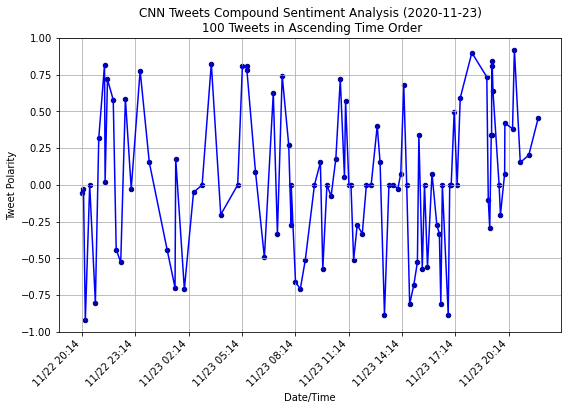

In [18]:
# Extract date-time stamps from dataframe to a list
time_series = cnn_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = cnn_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"CNN Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
cnn_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/cnn_output.png')

### Fox News

In [19]:
# Set Fox News user account
user_account = "foxnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
fox_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
fox_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,foxnews,1330990931621851142,2020-11-23 21:45:41,332,Pa. Supreme Court rejects Trump challenge to absentee ballots in Allegheny County https://t.co/6xm9o2syHk
1,foxnews,1330990424090152961,2020-11-23 21:43:40,368,Mattis says he hopes Joe Biden takes 'America First' out of national security strategy https://t.co/uqOtE3T5sQ
2,foxnews,1330990025887125510,2020-11-23 21:42:05,37,"Get your copy - pre-order today: Pete Hegseth’s ""Modern Warriors: Real Stories from Real Heroes,"" available in bookstores starting Nov. 24. https://t.co/ROuK8aCWF1 https://t.co/F8nDd59NUy"
3,foxnews,1330973072845901828,2020-11-23 20:34:43,345,Biden to tap former Fed Chair Janet Yellen as Treasury secretary: report https://t.co/tXapuCSNpz
4,foxnews,1330958506783105026,2020-11-23 19:36:50,172,"NYC police upping patrol amid uptick in 'subway shove' incidents, shootings https://t.co/ogKy5BpAYH"


In [20]:
len(fox_tweets_df)

100

In [21]:
# Set tweets series as data source for analysis
tweet_text_series = fox_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
fox_tweets_df["Compound SA"] = compound
fox_tweets_df["Positive SA"] = positive
fox_tweets_df["Neutral SA"] = neutral
fox_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
fox_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
fox_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,foxnews,1330990931621851142,2020-11-23 21:45:41,332,Pa. Supreme Court rejects Trump challenge to absentee ballots in Allegheny County https://t.co/6xm9o2syHk,-0.1027,0.255,0.469,0.276
1,foxnews,1330990424090152961,2020-11-23 21:43:40,368,Mattis says he hopes Joe Biden takes 'America First' out of national security strategy https://t.co/uqOtE3T5sQ,0.6369,0.286,0.714,0.000
2,foxnews,1330990025887125510,2020-11-23 21:42:05,37,"Get your copy - pre-order today: Pete Hegseth’s ""Modern Warriors: Real Stories from Real Heroes,"" available in bookstores starting Nov. 24. https://t.co/ROuK8aCWF1 https://t.co/F8nDd59NUy",0.5106,0.130,0.870,0.000
3,foxnews,1330973072845901828,2020-11-23 20:34:43,345,Biden to tap former Fed Chair Janet Yellen as Treasury secretary: report https://t.co/tXapuCSNpz,0.2023,0.130,0.870,0.000
4,foxnews,1330958506783105026,2020-11-23 19:36:50,172,"NYC police upping patrol amid uptick in 'subway shove' incidents, shootings https://t.co/ogKy5BpAYH",0.0000,0.000,1.000,0.000


The period began at 2020-11-19 02:17:50 and ended at 2020-11-23 21:45:41.
The duration was 4 days 19:27:51.


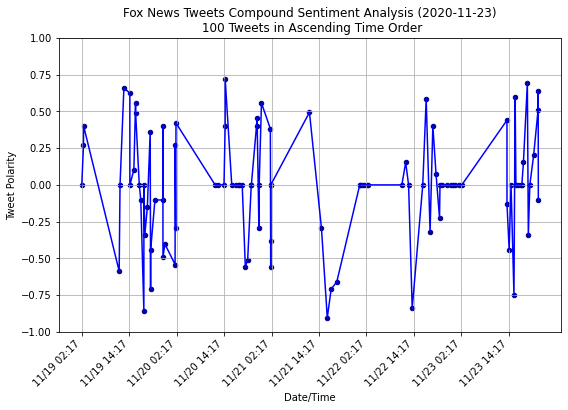

In [22]:
# Extract date-time stamps from dataframe to a list
time_series = fox_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=12))
dates = ticks_list

# Plot scatter
ax = fox_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"Fox News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
fox_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/fox_output.png')

### New York Times

In [23]:
# Set New York Times user account
user_account = "nytimes"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
nyt_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
nyt_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,nytimes,1330994559996792836,2020-11-23 22:00:06,364,"The head of the General Services Administration, Emily Murphy, ignored a request to brief Congress on her delay in recognizing President-elect Joe Biden’s victory and beginning the formal transition. She has given no public explanation for her decision.\nhttps://t.co/xVdoJg50b7"
1,nytimes,1330990572690092032,2020-11-23 21:44:15,1533,"Breaking News: Michigan’s top elections board voted to certify the election results, a blow to President Trump, who has been trying to subvert President-elect Joe Biden’s win there. https://t.co/YZ07zyxkxu"
2,nytimes,1330989512420433924,2020-11-23 21:40:03,98,A scientist tracked the dangers of flame retardants in children's toys and why manufacturers cannot seem to stop using them.\nhttps://t.co/BMwaMlBwkI
3,nytimes,1330987042545733633,2020-11-23 21:30:14,779,"President-elect Joe Biden, who turned 78 last week, has consistently worn masks during the pandemic, and has been mocked by President Trump for doing so. https://t.co/9075JwROpQ"
4,nytimes,1330985170887979009,2020-11-23 21:22:47,587,"Janet Yellen, who was the first female Fed chair, is likely to bring to the Treasury a long-held preference for giving government help to struggling households, and for slightly tighter financial regulation, as she navigates the economic crisis. https://t.co/IMRu2NmvhI https://t.co/7cucRFaBDV"


In [24]:
len(nyt_tweets_df)

100

In [25]:
# Set tweets series as data source for analysis
tweet_text_series = nyt_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
nyt_tweets_df["Compound SA"] = compound
nyt_tweets_df["Positive SA"] = positive
nyt_tweets_df["Neutral SA"] = neutral
nyt_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
nyt_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
nyt_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,nytimes,1330994559996792836,2020-11-23 22:00:06,364,"The head of the General Services Administration, Emily Murphy, ignored a request to brief Congress on her delay in recognizing President-elect Joe Biden’s victory and beginning the formal transition. She has given no public explanation for her decision.\nhttps://t.co/xVdoJg50b7",-0.7003,0.000,0.841,0.159
1,nytimes,1330990572690092032,2020-11-23 21:44:15,1533,"Breaking News: Michigan’s top elections board voted to certify the election results, a blow to President Trump, who has been trying to subvert President-elect Joe Biden’s win there. https://t.co/YZ07zyxkxu",0.6808,0.172,0.828,0.000
2,nytimes,1330989512420433924,2020-11-23 21:40:03,98,A scientist tracked the dangers of flame retardants in children's toys and why manufacturers cannot seem to stop using them.\nhttps://t.co/BMwaMlBwkI,-0.3208,0.078,0.789,0.133
3,nytimes,1330987042545733633,2020-11-23 21:30:14,779,"President-elect Joe Biden, who turned 78 last week, has consistently worn masks during the pandemic, and has been mocked by President Trump for doing so. https://t.co/9075JwROpQ",-0.5423,0.000,0.842,0.158
4,nytimes,1330985170887979009,2020-11-23 21:22:47,587,"Janet Yellen, who was the first female Fed chair, is likely to bring to the Treasury a long-held preference for giving government help to struggling households, and for slightly tighter financial regulation, as she navigates the economic crisis. https://t.co/IMRu2NmvhI https://t.co/7cucRFaBDV",-0.2500,0.141,0.717,0.141


The period began at 2020-11-22 21:30:06 and ended at 2020-11-23 22:00:06.
The duration was 1 days 00:30:00.


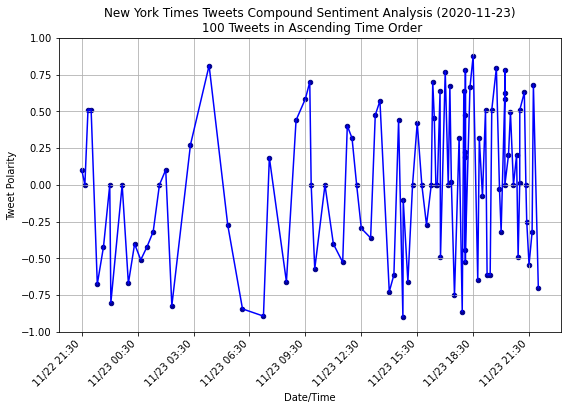

In [26]:
# Extract date-time stamps from dataframe to a list
time_series = nyt_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = nyt_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"New York Times Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
nyt_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/nyt_output.png')

### Average Sentiment Analysis by News Organization

In [27]:
# Calculate average compound sentiment analysis for each news organization
bbc_asa = bbc_tweets_df["Compound SA"].mean()
cbs_asa = cbs_tweets_df["Compound SA"].mean()
cnn_asa = cnn_tweets_df["Compound SA"].mean()
fox_asa = fox_tweets_df["Compound SA"].mean()
nyt_asa = nyt_tweets_df["Compound SA"].mean()

In [28]:
# Create a dictionary of news organizations and their compound sentiment analysis scores (key, values)
news_dict = {"BBC News": bbc_asa, "CBS News": cbs_asa, "CNN": cnn_asa, "Fox News": fox_asa, "NY Times": nyt_asa}

# Convert dictionary to Series
news_asa = pd.Series(news_dict)

# Convert Series to DataFrame
news_asa_df = pd.DataFrame(news_asa).reset_index()

# Rename column
news_asa_df.rename(columns={"index": "News Org", 0: "Avg Comp SA"}, inplace=True)

# Display DataFrame
news_asa_df

,News Org,Avg Comp SA
0,BBC News,0.030504
1,CBS News,-0.018823
2,CNN,0.042096
3,Fox News,-0.007150
4,NY Times,0.003267


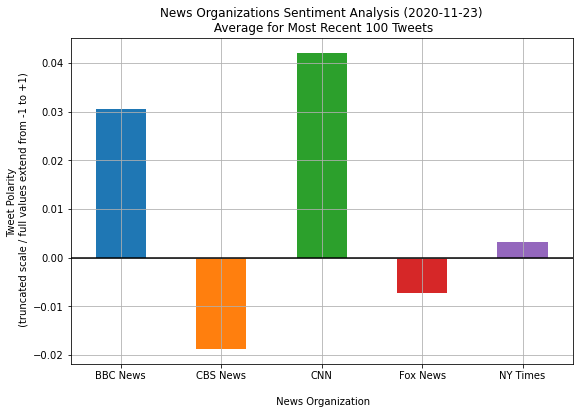

In [29]:
# Plot scatter
ax = news_asa_df.plot.bar(x='News Org',
                          y='Avg Comp SA',
                          title=f"News Organizations Sentiment Analysis ({date.today()})\n Average for Most Recent 100 Tweets",
                          legend=None,
                          rot=0,
                          grid=True,
                          color=['C0', 'C1', 'C2', 'C3', 'C4'],
                          figsize=(9,6))

# Set the x-axis label, y-axis label, and create heavy line y=0
ax.set_xlabel("\n News Organization")
ax.set_ylabel("Tweet Polarity \n (truncated scale / full values extend from -1 to +1)")
ax.axhline(y=0, alpha=3, color='black')   

# Save image as png-format file.
ax.figure.savefig('Images/5_major_news_orgs_output.png')